In [35]:
from collections import Counter
import matplotlib.pyplot as plt

The function opens the log files, combines all the relevant data into a dictionary:

In [28]:
def calculate_stats():
    turns = 0
    fields = ['card1', 'card2', 'chooser', 'metric', 
              'value1', 'value2', 'div1', 'div2', 
              'winner', 'game_starter', 'game_winner',
             'winner_card', 'winner_metric', 'card_wins', 'turns']
    info = {field: [] for field in fields}
    for i in range(1, 101):
        with open('game_' + str(i) + '.csv', 'r', encoding='utf-8') as f:
            content = f.readlines()
        stats = content[1:]
        info['game_starter'].append(int(content[1].split(',')[-1]))
        info['game_winner'].append(int(content[-1].split(',')[-1]))
        if info['game_winner'][-1] == 1:
            info['winner_card'].append(content[-1].split(',')[1])
        else:
            info['winner_card'].append(content[-1].split(',')[2])
        info['winner_metric'].append(content[-1].split(',')[4])
        info['turns'].append(len(stats))
        for stat in stats:
            data = stat.split(',')[1:]
            for i, field in enumerate(data):
                info[fields[i]].append(field.strip('\n'))
        card_wins = []
        for j, winner in enumerate(info['winner']):
            if int(winner) == 1:
                info['card_wins'].append(info['card1'][j])
            else:
                info['card_wins'].append(info['card2'][j])
        turns += len(stats)
    return info

info = calculate_stats()

**The following statistics are calculated:**
winning turns per card, winning final turns per card; usage per metric, winning final turns per metric; maximal, minimal and average number of turns per game.

In [65]:
card_wins = Counter(info['card_wins'])
cw_count = card_wins.most_common()
winner_cards = Counter(info['winner_card'])
wc_count = winner_cards.most_common()

metrics = Counter(info['metric'])
winner_metrics = Counter(info['winner_metric'])
m_count = metrics.most_common()
wm_count = winner_metrics.most_common()

turns = [max(info['turns']), min(info['turns']), sum(info['turns'])/100]

Plots built for the calculated data.  
**Winning turns per card:**

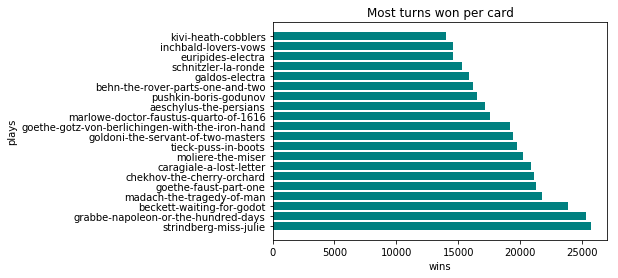

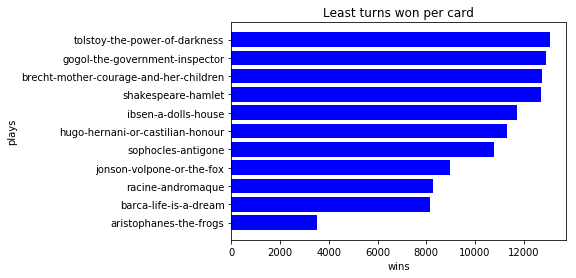

In [72]:
cw_divisions = [cw[0].split(';')[1] for cw in cw_count[:20]]
cw_marks = [cw[1] for cw in cw_count[:20]]
plt.barh(cw_divisions, cw_marks, color='teal')
plt.title('Most turns won per card')
plt.xlabel('wins')
plt.ylabel('plays')
plt.show()

cw_divisions = [cw[0].split(';')[1] for cw in cw_count[:20:-1]]
cw_marks = [cw[1] for cw in cw_count[:20:-1]]
plt.barh(cw_divisions, cw_marks, color='blue')
plt.title('Least turns won per card')
plt.xlabel('wins')
plt.ylabel('plays')
plt.show()

**Final turns won per card**

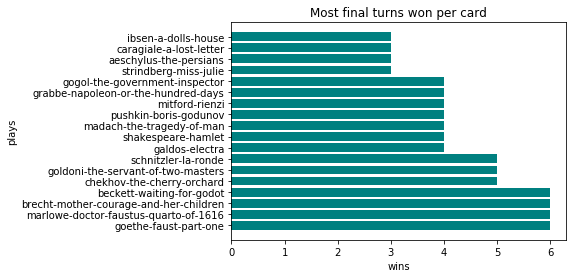

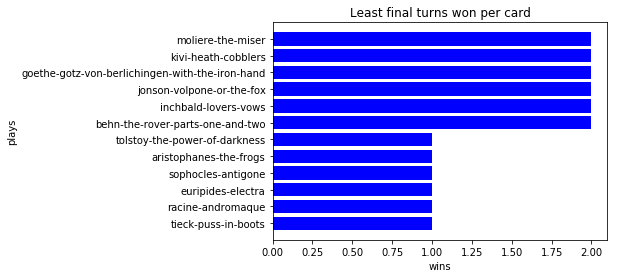

In [75]:
wc_divisions = [wc[0].split(';')[1] for wc in wc_count[:18]]
wc_marks = [wc[1] for wc in wc_count[:18]]
plt.barh(wc_divisions, wc_marks, color='teal')
plt.title('Most final turns won per card')
plt.xlabel('wins')
plt.ylabel('plays')
plt.show()

wc_divisions = [wc[0].split(';')[1] for wc in wc_count[:18:-1]]
wc_marks = [wc[1] for wc in wc_count[:18:-1]]
plt.barh(wc_divisions, wc_marks, color='blue')
plt.title('Least final turns won per card')
plt.xlabel('wins')
plt.ylabel('plays')
plt.show()

**Usage per metric 
Final turns won per metric.**

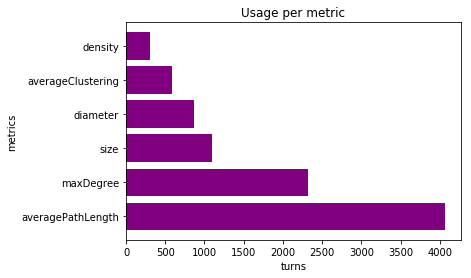

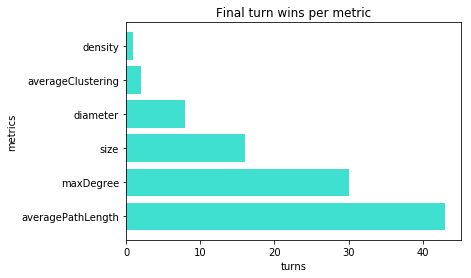

In [58]:
m_divisions = [m[0] for m in m_count]
m_marks = [m[1] for m in m_count]
plt.barh(m_divisions, m_marks, color='purple')
plt.title('Usage per metric')
plt.xlabel('turns')
plt.ylabel('metrics')
plt.show()

wm_divisions = [wm[0] for wm in wm_count]
wm_marks = [wm[1] for wm in wm_count]
plt.barh(wm_divisions, wm_marks, color='turquoise')
plt.title('Final turns won per metric')
plt.xlabel('turns')
plt.ylabel('metrics')
plt.show()

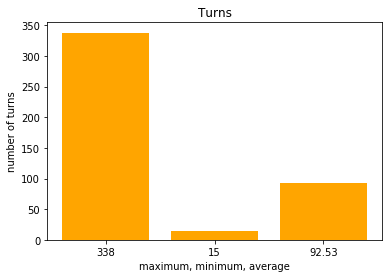

In [80]:
turn_divisions = [str(turn) for turn in turns]
turn_marks = turns
plt.bar(turn_divisions, turn_marks, color='orange')
plt.title('Turns')
plt.xlabel('maximum, minimum, average')
plt.ylabel('number of turns')
plt.show()